<a href="https://colab.research.google.com/github/YoungJae20213137/24_Lab1_1/blob/main/Lab1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Text Cell!


*   마크다운 형식의 텍스트 셀입니다.
*   docstring 등 여러 줄 주석을 효과적으로 시각화 할 수 있습니다.
*   마크다운 문법을 숙지하시고 사용하시면 좋습니다.

In [ ]:
# Code Cell!
a = 1
b = 2
print(a+b)

3


In [ ]:
!nvidia-smi

Mon Oct 28 08:12:40 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   57C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

total 72
drwx------ 1 root root 4096 Oct 28 08:12 .
drwxr-xr-x 1 root root 4096 Oct 28 08:12 ..
-r-xr-xr-x 1 root root 1169 Jan  1  2000 .bashrc
drwxr-xr-x 1 root root 4096 Oct 24 13:30 .cache
drwxr-xr-x 1 root root 4096 Oct 24 13:30 .config
drwxr-xr-x 1 root root 4096 Oct 24 13:30 .ipython
drwx------ 1 root root 4096 Oct 24 13:30 .jupyter
drwxr-xr-x 2 root root 4096 Oct 28 08:12 .keras
drwx------ 3 root root 4096 Oct 24 13:13 .launchpadlib
drwxr-xr-x 1 root root 4096 Oct 24 13:30 .local
drwxr-xr-x 4 root root 4096 Oct 24 13:30 .npm
-rw-r--r-- 1 root root  161 Jul  9  2019 .profile
-r-xr-xr-x 1 root root  254 Jan  1  2000 .tmux.conf
-rw-r--r-- 1 root root  211 Oct 24 13:30 .wget-hsts


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


2024.10.30 #1

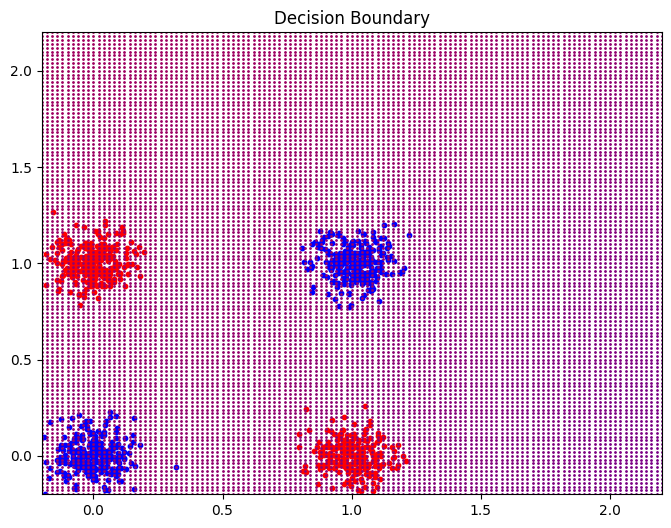

Loss : 4.74491
Loss : 2.13809
Loss : 0.11376
Loss : 0.04289
Loss : 0.02768


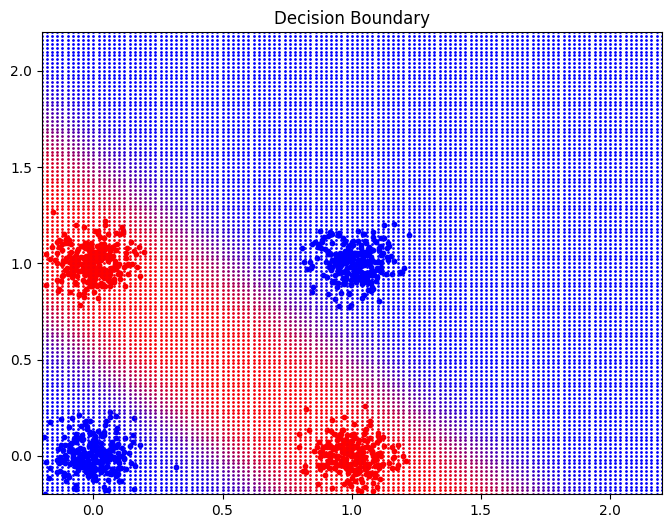

Loss : 0.02078
Loss : 0.01464
Loss : 0.01213
Loss : 0.00999
Loss : 0.00783


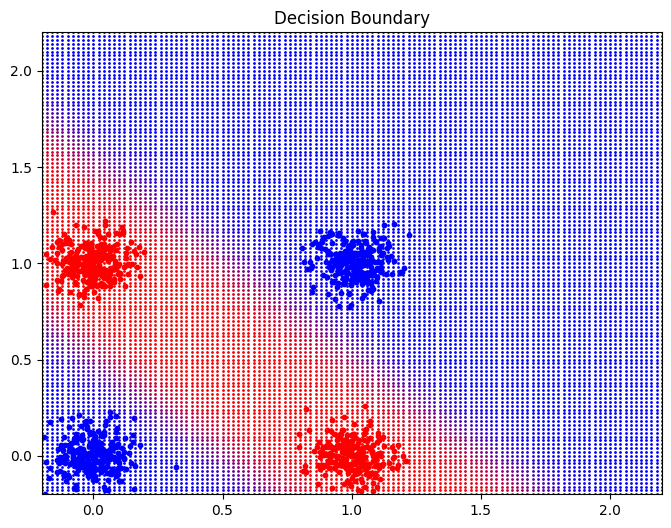

In [ ]:
# Import Library

import torch
import torch.nn as nn
from torch.optim import Adam
from torch.utils.data.dataset import Dataset
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt

# Class Separator

class Separator(nn.Module):
  def __init__(self):
    super(Separator, self).__init__()
    self.fc1 = nn.Linear(2, 4)
    self.fc2 = nn.Linear(4, 1)

  def forward(self, x):
    x = self.fc1(x)
    x = nn.functional.relu(x)
    x = self.fc2(x)
    x = torch.sigmoid(x)
    return x

# Class DataGenerator

# class DataGenerator(Dataset):
#   def __init__(self, type_, length, std=0.08):
#     self.length = length
#     if type_ == 'and':
#       self.var_l = [0, 0, 0, 1]
#     elif type_ == 'or':
#       self.var_l = [0, 1, 1, 1]
#     elif type_ == 'xor':
#       self.var_l = [0, 1, 1, 0]
#     else:
#       self.var_l = [0] * length

#     self.dataset = []
#     for i in range(length):
#       x = np.random.normal(i%2, std)
#       y = np.random.normal((i//2)%2, std)
#       val = self.var_l[i%4]
#       self.dataset.append((x, y, val))

#     def get_dataset(self):
#       return self.dataset

#     def __len__(self):
#       return self.length

#     def __getitem__(self, idx):
#       x, y, val = self.dataset[idx]
#       return (torch.Tensor([x, y]), torch.Tensor([val]))

class DataGenerator(Dataset):
    def __init__(self, type_, length, std=0.08):
        self.length = length
        if type_ == 'and':
            self.var_l = [0, 0, 0, 1]
        elif type_ == 'or':
            self.var_l = [0, 1, 1, 1]
        elif type_ == 'xor':
            self.var_l = [0, 1, 1, 0]
        else:
            self.var_l = [0] * length

        self.dataset = []
        for i in range(length):
            x = np.random.normal(i % 2, std)
            y = np.random.normal((i // 2) % 2, std)
            val = self.var_l[i % 4]
            self.dataset.append((x, y, val))

    def get_dataset(self):
        return self.dataset

    def __len__(self):
        return self.length

    def __getitem__(self, idx):
        x, y, val = self.dataset[idx]
        return (torch.Tensor([x, y]), torch.Tensor([val]))

# Training Setup

DATASET = DataGenerator('xor', 1000)
lr = 0.1 # learning rate
batch_size = 20
num_epochs = 10
num_workers = 4
graph_x = np.linspace(-1.0, 2, 2)

params = {
    'batch_size': batch_size,
    'shuffle': True,
    'num_workers': num_workers
}

dataloader = DataLoader(DATASET, **params)
model = Separator().cuda()
optimizer = Adam(model.parameters(), lr=lr)

# Training Part

def show(model):
    plt.figure(figsize=(8, 6))
    for item in DATASET.get_dataset():
        x, y, val = item
        color = 'red' if val == 1 else 'blue'
        plt.scatter(x, y, c=color, s=10)

    # Plotting decision boundary
    x_range = np.arange(-0.2, 2.2, 0.02)
    y_range = np.arange(-0.2, 2.2, 0.02)
    for x in x_range:
        for y in y_range:
            val = model(torch.Tensor([x, y]).cuda())
            plt.scatter(x, y, c=[[val.item(), 0, 1 - val.item()]], s=1)

    plt.xlim(-0.2, 2.2)
    plt.ylim(-0.2, 2.2)
    plt.title("Decision Boundary")
    plt.show()


# def show(model):
#   for item in DATASET.get_dataset():
#     x, y, val = item
#     if val == 1:
#       plt.scatter(x, y, c='red', s=10)
#     else:
#       plt.scatter(x, y, c='blue', s=10)

#     for x in np.arrange(-0.2, 1.2, 0.02):
#       for y in np.arrange(-0.2, 1.2, 0.02):
#         val = model(torch.Tensor([x, y]).cuda())
#         val = val.data.tolist()[0]
#         plt.scatter(x, y, c=[[val, 0, 1-val]], s=1)
#     plt.show()

show(model)

# for epoch in range(num_epochs):
#   total_loss = 0
#   for x, val in dataloader:
#     x = x.cuda()
#     val = val.cuda()
#     optimizer.zero_grad()
#     outputs = model(x)
#     #loss = torch.sum(torch.pow(val - val_l, 2))
#     loss = torch.sum((outputs - val) ** 2)

#     loss.backward()
#     optimizer.step()
#     total_loss += loss.item()
#   print("Loss : {:.5f}".format(total_loss / len(DATASET)))

#   if epoch % 5 == 4:
#     show(model)

# Training Loop

for epoch in range(num_epochs):
    total_loss = 0
    for x, val in dataloader:
        x = x.cuda()
        val = val.cuda()
        optimizer.zero_grad()
        outputs = model(x)
        loss = torch.sum((outputs - val) ** 2)  # Corrected loss calculation

        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    print("Loss : {:.5f}".format(total_loss / len(dataloader)))  # Average loss

    if epoch % 5 == 4:
        show(model)